# Model OHE 4
Here we try OHE 3 but without removing features that have more than 10% outliers.

In [1]:
"""
Changes from OHE3:
-Here we do not drop features with outliers
"""

'\nChanges from OHE3:\n-Here we do not drop features with outliers\n'

In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from Cleaning_functions import *
from helpers import *
from exploratory_data_analysis import *
from preprocessing import *

In [4]:
x_train, x_test, y_train, train_ids, test_ids = load_csv_data("data\dataset\dataset")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\cgreg\AppData\Local\Temp\ipykernel_3344\4219252773.py:1: SyntaxWarning: invalid escape sequence '\d'
  x_train, x_test, y_train, train_ids, test_ids = load_csv_data("data\dataset\dataset")


In [27]:
Y_tr = (y_train + 1) / 2

In [28]:
X_train, keep_mask = remove_nan_features(x_train, 0.2)
X_test = x_test[:, keep_mask]

In [29]:
print(X_train.shape, X_test.shape)

(328135, 143) (109379, 143)


In [30]:
cat_mask, num_mask = detect_categorical_features(X_train, max_unique=10)

In [31]:
print(np.sum(cat_mask), np.sum(num_mask))

99 44


In [32]:
x_tr, y_tr, x_va, y_va, x_te, y_te = stratified_three_way_split(X_train, Y_tr)

In [33]:
print(X_train.shape, x_tr.shape, y_tr.shape, x_va.shape, y_va.shape, x_te.shape, y_te.shape)

(328135, 143) (229695, 143) (229695,) (49220, 143) (49220,) (49220, 143) (49220,)


In [34]:
# Numerical imputation (compute medians from training)
x_tr_imp, medians = impute_numerical(x_tr, num_mask)
# Apply same medians to val/test
x_va_imp, _ = impute_numerical(x_va, num_mask, medians)
x_te_imp, _ = impute_numerical(x_te, num_mask, medians)
x_test_imp, _ = impute_numerical(X_test, num_mask, medians)
# Categorical imputation (compute modes from training)
x_tr_imp, modes = impute_categorical(x_tr_imp, cat_mask)
# Apply same modes to val/test
x_va_imp, _ = impute_categorical(x_va_imp, cat_mask, modes)
x_te_imp, _ = impute_categorical(x_te_imp, cat_mask, modes)
x_test_imp, _ = impute_categorical(x_test_imp, cat_mask, modes)

In [35]:
# Check for any remaining NaN values
print(np.isnan(x_tr_imp).sum(),
      np.isnan(x_va_imp).sum(),
      np.isnan(x_te_imp).sum(), np.isnan(x_test_imp).sum())

0 0 0 0


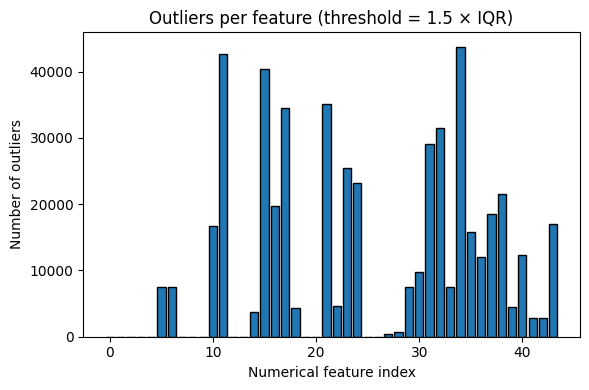

In [36]:
outlier_mask, outlier_counts = detect_outliers(x_tr_imp, num_mask, threshold=1.5, plot=True)

In [37]:
print(outlier_counts)

[    0     0     0     0     0  7523  7523     0     0     0 16765 42722
     0     0  3745 40468 19668 34545  4275     0     0 35062  4608 25522
 23171     0     0   441   754  7544  9823 29058 31441  7525 43748 15806
 12023 18456 21474  4498 12403  2772  2772 16957]


In [38]:
outlier_pctg = outlier_counts / x_tr_imp.shape[0]
print(outlier_pctg)

[0.         0.         0.         0.         0.         0.03275213
 0.03275213 0.         0.         0.         0.07298809 0.18599447
 0.         0.         0.01630423 0.17618146 0.08562659 0.15039509
 0.01861164 0.         0.         0.1526459  0.02006139 0.11111256
 0.10087725 0.         0.         0.00191994 0.00328261 0.03284355
 0.04276541 0.12650689 0.13688152 0.03276084 0.19046126 0.06881299
 0.05234332 0.08035003 0.09348919 0.01958249 0.05399769 0.01206818
 0.01206818 0.07382398]


In [40]:
drop_threshold = 1
new_num_mask = outlier_pctg < drop_threshold


In [41]:
#Change the mask again
keep_mask = np.ones(x_tr_imp.shape[1], dtype=bool)
num_indices = np.where(num_mask)[0]
keep_mask[num_indices] = new_num_mask

In [42]:
x_tr_filt = x_tr_imp[:, keep_mask]
x_va_filt = x_va_imp[:, keep_mask]
x_te_filt = x_te_imp[:, keep_mask]
x_test_filt = x_test_imp[:, keep_mask]
num_mask = num_mask[keep_mask]
cat_mask = cat_mask[keep_mask]

In [43]:
print(np.sum(num_mask), np.sum(cat_mask))

44 99


In [44]:
# Fit one-hot encoder on training data
x_tr_enc, categories = one_hot_encode(x_tr_filt, cat_mask, drop_first=True)

# Apply the same categories to validation and test data
x_va_enc, _ = one_hot_encode(x_va_filt, cat_mask, categories, drop_first=True)
x_te_enc, _ = one_hot_encode(x_te_filt, cat_mask, categories, drop_first=True)
x_test_enc, _ = one_hot_encode(x_test_filt, cat_mask, categories, drop_first=True)

In [45]:
print(x_tr_enc.shape, x_va_enc.shape, x_te_enc.shape, x_test_enc.shape) 

(229695, 368) (49220, 368) (49220, 368) (109379, 368)


In [46]:
cat_mask_enc, num_mask_enc = detect_categorical_features(x_tr_enc, max_unique=10)

In [47]:
print(np.sum(cat_mask_enc), np.sum(num_mask_enc))

324 44


In [48]:
print(np.max(x_tr_enc[:,cat_mask_enc]))

1.0


In [49]:
x_tr_std, means, stds = standardize_features(x_tr_enc, num_mask_enc)
x_va_std, _, _ = standardize_features(x_va_enc, num_mask_enc, means, stds)
x_te_std, _, _ = standardize_features(x_te_enc, num_mask_enc, means, stds)
x_test_std, _, _ = standardize_features(x_test_enc, num_mask_enc, means, stds)

In [51]:
corr_y = feature_target_correlation(x_tr_std, y_tr)


In [52]:

min_corr = 0
keep_mask_corr = np.abs(corr_y) > min_corr


In [53]:
x_tr_sel = x_tr_std[:, keep_mask_corr]
x_va_sel = x_va_std[:, keep_mask_corr]
x_te_sel = x_te_std[:, keep_mask_corr]
x_test_sel = x_test_std[:, keep_mask_corr]

In [54]:
print(x_tr_sel.shape, x_va_sel.shape, x_te_sel.shape, x_test_sel.shape)

(229695, 368) (49220, 368) (49220, 368) (109379, 368)


In [55]:
cat_mask_sel, num_mask_sel = detect_categorical_features(x_tr_sel, max_unique=10)

In [56]:
print(np.sum(cat_mask_sel))

324


In [57]:
corr_mat = correlation_matrix(x_tr_sel)


In [58]:
threshold = 0.9
to_drop = set()

for i in range(corr_mat.shape[0]):
    for j in range(i + 1, corr_mat.shape[1]):
        if abs(corr_mat[i, j]) > threshold:
            # Compare absolute correlation with y
            if abs(corr_y[i]) < abs(corr_y[j]):
                to_drop.add(i)
            else:
                to_drop.add(j)

keep_mask_inter = np.ones(x_tr_sel.shape[1], dtype=bool)
keep_mask_inter[list(to_drop)] = False



In [59]:
x_tr_final = x_tr_sel[:, keep_mask_inter]
x_va_final = x_va_sel[:, keep_mask_inter]
x_te_final = x_te_sel[:, keep_mask_inter]
x_test_final = x_test_sel[:, keep_mask_inter]

In [60]:
print("Dropped (low corr):", np.sum(~keep_mask_corr))
print("Dropped (high inter):", np.sum(~keep_mask_inter))
print("Remaining features:", x_tr_final.shape[1])


Dropped (low corr): 0
Dropped (high inter): 82
Remaining features: 286


In [61]:
best_params, best_f1, results = grid_search(
    y_tr, x_tr_final,
    y_va, x_va_final,
    pos_weights=[9.25, 9.5, 9.75],
    lambdas=[1e-8],
    thresholds=np.linspace(0.65, 0.85, 200),
    max_iter=10000,
    gamma=0.5
)



=== Run 1/3 (pos_weight=9.25, lambda_=1e-08) ===
New best F1 = 0.4141
New best F1 = 0.4145
New best F1 = 0.4152
New best F1 = 0.4160
New best F1 = 0.4163
New best F1 = 0.4166
New best F1 = 0.4167
New best F1 = 0.4167
New best F1 = 0.4168
New best F1 = 0.4171
New best F1 = 0.4174
New best F1 = 0.4175
New best F1 = 0.4179
New best F1 = 0.4184
New best F1 = 0.4184
New best F1 = 0.4190
New best F1 = 0.4195
New best F1 = 0.4197
New best F1 = 0.4199
New best F1 = 0.4204
New best F1 = 0.4210
New best F1 = 0.4211
New best F1 = 0.4223

=== Run 2/3 (pos_weight=9.5, lambda_=1e-08) ===

=== Run 3/3 (pos_weight=9.75, lambda_=1e-08) ===

=== Grid Search Complete ===
Best F1 = 0.4223 at pos_weight=9.25, λ=1e-08, threshold=0.728391959798995


In [62]:
X_final = np.vstack([x_tr_final, x_va_final])
y_final = np.concatenate([y_tr, y_va])


In [63]:
best_lambda = 1e-8
best_pos_weight = 9.25
best_neg_weight = 1.0
best_threshold = 0.728391959798995

final_loss, w_final = logistic_regression_weighted_gd(
    y_final, X_final,
    lambda_=best_lambda,
    gamma=0.5,
    pos_weight=best_pos_weight,
    neg_weight=best_neg_weight,
    max_iter=10000,
    verbose=True
)

print("Final training loss:", final_loss)


Iter     0 | Loss = 0.693147 | GradNorm = 0.4619
Iter   100 | Loss = 0.471867 | GradNorm = 0.0249
Iter   200 | Loss = 0.467460 | GradNorm = 0.0072
Iter   300 | Loss = 0.465654 | GradNorm = 0.0050
Iter   400 | Loss = 0.464698 | GradNorm = 0.0038
Iter   500 | Loss = 0.464122 | GradNorm = 0.0030
Iter   600 | Loss = 0.463743 | GradNorm = 0.0025
Iter   700 | Loss = 0.463477 | GradNorm = 0.0021
Iter   800 | Loss = 0.463280 | GradNorm = 0.0019
Iter   900 | Loss = 0.463128 | GradNorm = 0.0016
Iter  1000 | Loss = 0.463007 | GradNorm = 0.0015
Iter  1100 | Loss = 0.462907 | GradNorm = 0.0013
Iter  1200 | Loss = 0.462824 | GradNorm = 0.0012
Iter  1300 | Loss = 0.462752 | GradNorm = 0.0012
Iter  1400 | Loss = 0.462690 | GradNorm = 0.0011
Iter  1500 | Loss = 0.462636 | GradNorm = 0.0010
Iter  1600 | Loss = 0.462588 | GradNorm = 0.0010
Iter  1700 | Loss = 0.462544 | GradNorm = 0.0009
Iter  1800 | Loss = 0.462505 | GradNorm = 0.0009
Iter  1900 | Loss = 0.462469 | GradNorm = 0.0008
Iter  2000 | Loss = 

In [64]:
print(w_final @ w_final)

14.224566845964485


In [65]:
acc, f1 = evaluate_model(y_te, x_te_final, w_final, best_threshold)

 Accuracy: 87.85%
 F1 Score: 0.4252


Confusion Matrix:
[[41027  3847]
 [ 2134  2212]]
TN=41027, FP=3847, FN=2134, TP=2212


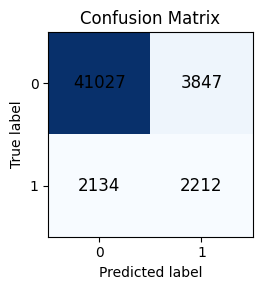

In [66]:
preds, _ = predict_with_threshold(x_te_final, w_final, threshold=best_threshold)
cm = confusion_matrix_numpy(y_te, preds)

In [68]:
y_pred_final, _ = predict_with_threshold(x_test_final, w_final, best_threshold)
y_pred_final = 2 * y_pred_final - 1   # converts 0→-1, 1→1

create_csv_submission(test_ids, y_pred_final, "ModelOHE5_preds.csv")